In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.io as sio
import sys
sys.path.append('./helpers')
import loadmat as lm
from sklearn import linear_model
from scipy import signal
from sklearn.model_selection import cross_val_score, cross_validate
import os
from sklearn.metrics import make_scorer, confusion_matrix
import glob
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from helpers import preprocess

In [4]:
data = lm.loadmat(r'F:\temp\MEC_0.8_100.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 26 10:57:04 2019',
 '__version__': '1.0',
 '__globals__': [],
 'output': {'X': array([ 118,  138,  158,  178,  198,  218,  238,  258,  278,  298,  518,
          538,  558,  578,  598,  618,  638,  658,  678,  698,  918,  938,
          958,  978,  998, 1018, 1038, 1058, 1078, 1098, 1318, 1338, 1358,
         1378, 1398, 1418, 1438, 1458, 1478, 1498, 1718, 1738, 1758, 1778,
         1798, 1818, 1838, 1858, 1878, 1898, 2118, 2138, 2158, 2178, 2198,
         2218, 2238, 2258, 2278, 2298, 2518, 2538, 2558, 2578, 2598, 2618,
         2638, 2658, 2678, 2698, 2918, 2938, 2958, 2978, 2998, 3018, 3038,
         3058, 3078, 3098, 3318, 3338, 3358, 3378, 3398, 3418, 3438, 3458,
         3478, 3498, 3718, 3738, 3758, 3778, 3798, 3818, 3838, 3858, 3878,
         3898, 4118, 4138, 4158, 4178, 4198, 4218, 4238, 4258, 4278, 4298,
         4518, 4538, 4558, 4578, 4598, 4618, 4638, 4658, 4678, 4698, 4918,
         4938, 4958, 

In [32]:
corr_dat=data['output']['Y']
valid = np.logical_not(np.isnan(corr_dat[:,1]))
X=corr_dat[valid,0:6*10]
y=corr_dat[valid,90:100]
y=np.mean(y,axis=1)
y.shape
y=y.reshape((112,1))

import pandas as pd
df = pd.DataFrame(np.hstack((X,y)))

(112, 1)

In [8]:
X.shape

(112, 60)

In [72]:
import pandas as pd
df = pd.DataFrame(np.hstack((X,y)))

In [49]:
from statsmodels.graphics.correlation import plot_corr

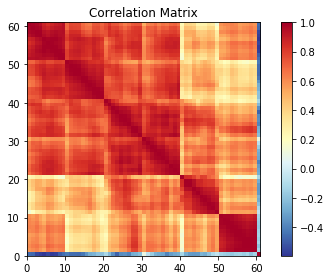

In [52]:
corr = df[50:61].corr()
fig=plot_corr(corr)

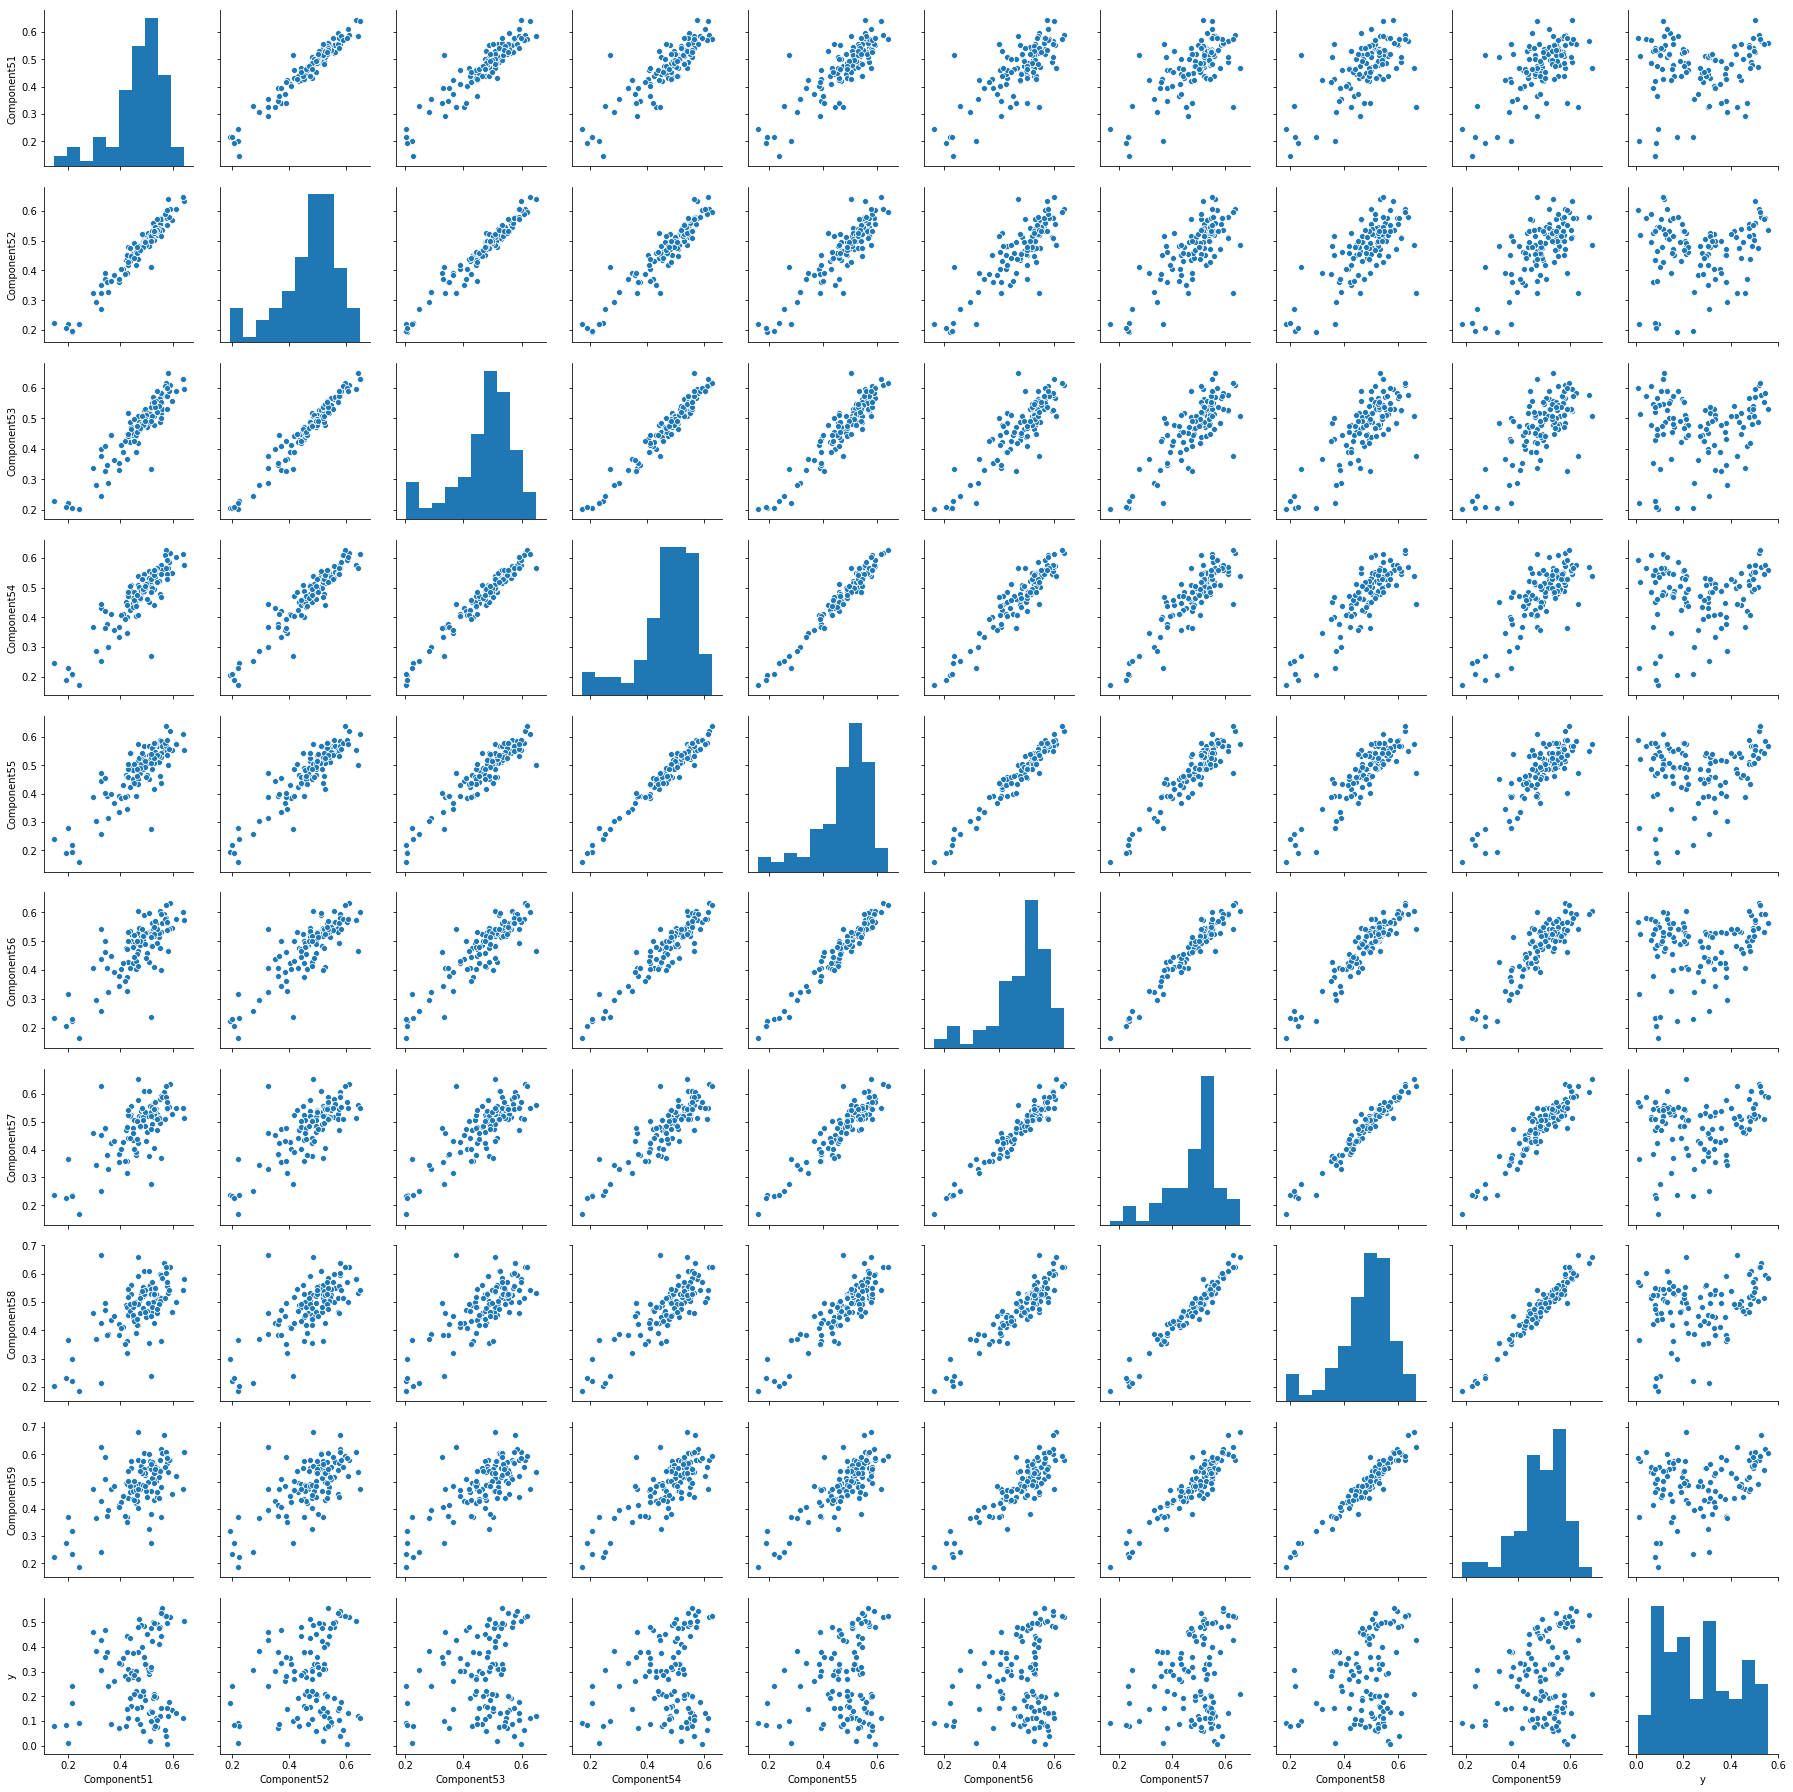

In [59]:
corr_dat=data['output']['Y']
valid = np.logical_not(np.isnan(corr_dat[:,1]))
X=corr_dat[valid,0:6*10]
y=corr_dat[valid,90:100]
y=np.mean(y,axis=1)
y.shape
y=y.reshape((112,1))

import pandas as pd
df = pd.DataFrame(np.hstack((X,y)))
df1=df.copy()
df1.columns=['Component'+str(i) for i in range(0,60)]+['y']
g = sns.pairplot(df1[df1.columns[51:61]])

# simple statsmodel regression, trying to predict average correlation in last gain trial based on last baseline trial

In [70]:
import statsmodels.formula.api as sm
formula_str = df1.columns[-1]+' ~ '+'+'.join(df1.columns[50:60])

model=sm.ols(formula=formula_str, data=df1[df1.columns[50:62]])
fitted = model.fit()
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.472
Date:                Tue, 26 Nov 2019   Prob (F-statistic):              0.161
Time:                        14:23:05   Log-Likelihood:                 59.005
No. Observations:                 112   AIC:                            -96.01
Df Residuals:                     101   BIC:                            -66.11
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1259      0.085      1.473      

In [71]:
formula_str

'y ~ Component50+Component51+Component52+Component53+Component54+Component55+Component56+Component57+Component58+Component59'

# just trying to predict last value of last gain trial

In [124]:
corr_dat=data['output']['Y']
valid = np.logical_not(np.isnan(corr_dat[:,1]))
X=corr_dat[valid,0:6*10]
y=corr_dat[valid,90]

y=y.reshape((112,1))

import pandas as pd
df = pd.DataFrame(np.hstack((X,y)))
df1=df.copy()
df1.columns=['Component'+str(i) for i in range(0,60)]+['y']

formula_str = df1.columns[-1]+' ~ '+'+'.join(df1.columns[50:60])

model=sm.ols(formula=formula_str, data=df1[df1.columns[50:62]])
fitted = model.fit()
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1.746
Date:                Wed, 27 Nov 2019   Prob (F-statistic):             0.0806
Time:                        11:00:44   Log-Likelihood:                 57.856
No. Observations:                 112   AIC:                            -93.71
Df Residuals:                     101   BIC:                            -63.81
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1211      0.086      1.403      

In [125]:
corr_dat=data['output']['Y']
valid = np.logical_not(np.isnan(corr_dat[:,1]))
X=[]
for i in range(0,16):
    idx =range(i,(i+1)*10)
    X.append(np.mean(corr_dat[valid,i:(i+1)*10],axis=1))

y=X[9]
X=X[0:5]
X=np.asarray(X).transpose();
y=np.asarray(y).reshape((len(y),1))


import pandas as pd
df = pd.DataFrame(np.hstack((X,y)))
df1=df.copy()
df1.columns=['Component'+str(i) for i in range(0,5)]+['y']

formula_str = df1.columns[-1]+' ~ '+'+'.join(df1.columns[0:5])

model=sm.ols(formula=formula_str, data=df1)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     9.505
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           1.64e-07
Time:                        11:01:12   Log-Likelihood:                 157.95
No. Observations:                 112   AIC:                            -303.9
Df Residuals:                     106   BIC:                            -287.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0894      0.055      1.622      0.1

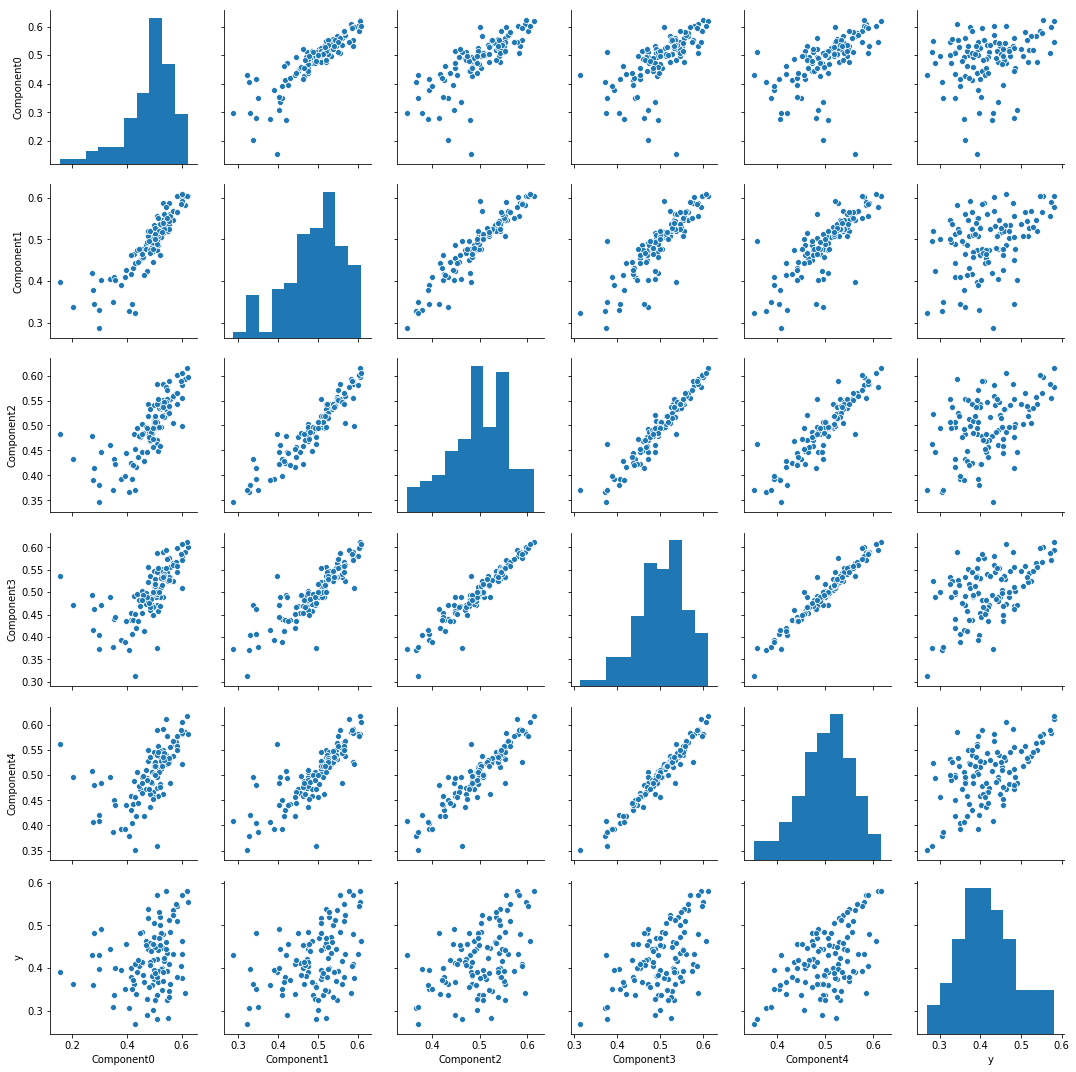

In [127]:
g = sns.pairplot(df1)

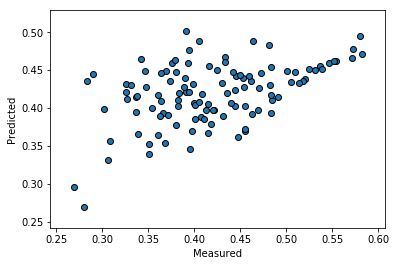

In [137]:
import sklearn
from sklearn.model_selection import cross_val_predict
clf = sklearn.linear_model.ARDRegression(compute_score=True,verbose=True)

ols = sklearn.linear_model.LinearRegression()
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(ols, X, y.reshape((len(y),)), cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Overall, the summary statistics from statsmodel say that its not really better than the intercept only model, and the summary statistics for the data suggest that looking at it with a linear model is not optimal: (check out this: https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate_

In [132]:
y.shape

(112, 1)

IndexError: index 75 is out of bounds for axis 0 with size 60

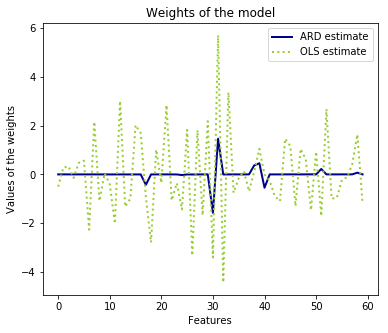

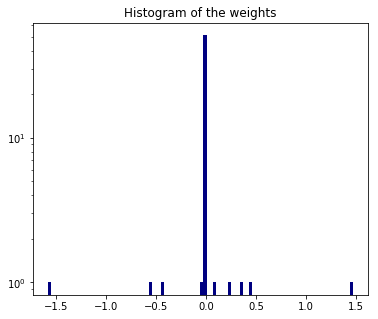

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import ARDRegression, LinearRegression

# #############################################################################
# Generating data matrix



# #############################################################################
# Fit the ARD Regression
clf = ARDRegression(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot the true weights, the estimated weights, the histogram of the
# weights, and predictions with standard deviations
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='darkblue', linestyle='-', linewidth=2,
         label="ARD estimate")
plt.plot(ols.coef_, color='yellowgreen', linestyle=':', linewidth=2,
         label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='navy', log=True)
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='gold', marker='o', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=2)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=1)
clf_poly = ARDRegression(threshold_lambda=1e5)
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial ARD", linewidth=2)
plt.plot(X_plot, y_plot, color='gold', linewidth=2,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()